In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
docs = [
    "hroughout history, the Book of Changes has been used principally as a divinatory text",
    "In addition to the primary meaning of each hexagram",
    "No one can tell you exactly how to phrase your question ",
    "The best approach is to try several kinds of questions and see which I Ching readings yield the best results for you",
    "The core of the I Ching are its 64 hexagrams, each composed of six lines",
    "Each horizontal line has either a broken and unbroken state, allowing for a total of 64 possible combinations",
    "the ancient Chinese Book of Changes is the oldest divination manual still in use today",
    "the Book of Changes has been used principally as a divinatory text",
    "It is based on a 3000 year old manuscript of Chinese wisdom",
    "your readings will be much more effective"
]


In [3]:
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(docs)
print("idf: ", [(n, idf) for idf, n in zip(vectorizer.idf_, vectorizer.get_feature_names())])
print("v2i: ", vectorizer.vocabulary_)

idf:  [('3000', 2.7047480922384253), ('64', 2.2992829841302607), ('addition', 2.7047480922384253), ('allowing', 2.7047480922384253), ('ancient', 2.7047480922384253), ('and', 2.2992829841302607), ('approach', 2.7047480922384253), ('are', 2.7047480922384253), ('as', 2.2992829841302607), ('based', 2.7047480922384253), ('be', 2.7047480922384253), ('been', 2.2992829841302607), ('best', 2.7047480922384253), ('book', 2.01160091167848), ('broken', 2.7047480922384253), ('can', 2.7047480922384253), ('changes', 2.01160091167848), ('chinese', 2.2992829841302607), ('ching', 2.2992829841302607), ('combinations', 2.7047480922384253), ('composed', 2.7047480922384253), ('core', 2.7047480922384253), ('divination', 2.7047480922384253), ('divinatory', 2.2992829841302607), ('each', 2.01160091167848), ('effective', 2.7047480922384253), ('either', 2.7047480922384253), ('exactly', 2.7047480922384253), ('for', 2.2992829841302607), ('has', 2.01160091167848), ('hexagram', 2.7047480922384253), ('hexagrams', 2.704

In [4]:
q = "the ancient Chinese Book of Changes is the oldest divination manual still in use today"
qtf_idf = vectorizer.transform([q])
res = cosine_similarity(tf_idf, qtf_idf)
res = res.ravel().argsort()[-3:]
print("\ntop 3 docs for '{}':\n{}".format(q, [docs[i] for i in res[::-1]]))


top 3 docs for 'the ancient Chinese Book of Changes is the oldest divination manual still in use today':
['the ancient Chinese Book of Changes is the oldest divination manual still in use today', 'the Book of Changes has been used principally as a divinatory text', 'hroughout history, the Book of Changes has been used principally as a divinatory text']


In [5]:
i2v = {i: v for v, i in vectorizer.vocabulary_.items()}
tfidf = tf_idf.todense()
vocab = [i2v[i] for i in range(tfidf.shape[1])]

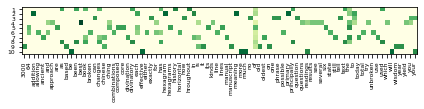

In [6]:
plt.imshow(tfidf, cmap="YlGn", vmin=tfidf.min(), vmax=tfidf.max())
plt.xticks(np.arange(tfidf.shape[1]), vocab, fontsize=6, rotation=90)
plt.yticks(np.arange(tfidf.shape[0]), np.arange(1, tfidf.shape[0] + 1), fontsize=6)
plt.tight_layout()
plt.show()